In [12]:
#import twitter
import pickle
import pandas as pd
from getpass import getpass
from matplotlib import pyplot as plt

In [173]:
consumer_key = getpass("API key : ")
consumer_secret = getpass("API secret key : ")
access_token_key = getpass("access token : ")
access_token_secret = getpass("secret access token : ")

api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_token_key,
                  access_token_secret=access_token_secret)

API key : ········
API secret key : ········
access token : ········
secret access token : ········


In [43]:
statuses = api.GetUserTimeline(screen_name='elonmusk',count=200)

In [44]:
print(len(statuses))

200


In [52]:
last_id = statuses[-1].id
print(last_id)

1370947478355333123


In [50]:
res = api.GetUserTimeline(screen_name='elonmusk',count=200,max_id=last_id)

In [51]:
print(len(res))

200


In [48]:
stop = False
while not stop:
    res = api.GetUserTimeline(screen_name='elonmusk',count=200,max_id=last_id)
    statuses = statuses + res[1:]
    last_id = statuses[-1].id
    if len(res)<200:
        stop=True

In [49]:
print(len(statuses))

200


In [32]:
print(statuses[-1])

{"created_at": "Sat Dec 26 19:04:29 +0000 2020", "favorite_count": 1635, "hashtags": [], "id": 1342909163903455233, "id_str": "1342909163903455233", "in_reply_to_screen_name": "IvanEscobosa", "in_reply_to_status_id": 1342908972030836737, "in_reply_to_user_id": 286507556, "lang": "en", "retweet_count": 68, "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "text": "@IvanEscobosa @Erdayastronaut @teslaownersSV A few more revisions needed. Probably Beta 10 or 11.", "urls": [], "user": {"created_at": "Tue Jun 02 20:12:29 +0000 2009", "description": "Technoking of Tesla", "favourites_count": 8418, "followers_count": 50435719, "friends_count": 104, "id": 44196397, "id_str": "44196397", "listed_count": 67258, "name": "Elon Musk", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "prof

In [147]:
last_id = statuses[-1].id
print(last_id)

1256243674268098561


In [184]:
res = api.GetUserTimeline(screen_name='elonmusk',count=200,max_id=last_id)

In [146]:
statuses = statuses + res

In [185]:
print("number of statuses: ",len(statuses))
print("id=",statuses[0].id,", date=",statuses[0].created_at,", text=",statuses[0].text)
print("id=",statuses[-1].id,", date=",statuses[-1].created_at,", text=",statuses[-1].text)
print("\n")
print("number of statuses in last call: ",len(res))
print("id=",res[0].id,", date=",res[0].created_at,", text=",res[0].text)
print("id=",res[-1].id,", date=",res[-1].created_at,", text=",res[-1].text)

number of statuses:  3263
id= 1380487877209956357 , date= Fri Apr 09 11:48:52 +0000 2021 , text= Epilogue is not quite on target though
id= 1256243674268098561 , date= Fri May 01 15:26:46 +0000 2020 , text= And the rocket's red glare, 
the bombs bursting in air


number of statuses in last call:  0


IndexError: list index out of range

In [199]:
#twitter_data = pd.json_normalize(statuses)
statuses_dicts = []
for s in statuses:
    statuses_dicts.append(s.AsDict())

In [200]:
twitter_data = pd.DataFrame(statuses_dicts)
twitter_data.head()

,created_at,favorite_count,hashtags,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,retweet_count,...,urls,user,user_mentions,quoted_status,quoted_status_id,quoted_status_id_str,media,truncated,retweeted_status,possibly_sensitive
0,Fri Apr 09 11:48:52 +0000 2021,12968.0,[],1380487877209956357,1380487877209956357,elonmusk,1.380481e+18,4.419640e+07,en,422,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Apr 09 11:24:30 +0000 2021,19984.0,[],1380481743531089924,1380481743531089924,elonmusk,1.380481e+18,4.419640e+07,en,540,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Apr 09 11:21:13 +0000 2021,36855.0,[],1380480918243090433,1380480918243090433,NaN,NaN,NaN,en,2439,...,[{'expanded_url': 'https://twitter.com/sciguys...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,[],{'created_at': 'Mon Sep 28 14:47:26 +0000 2020...,1.310592e+18,1310591955374665729,NaN,NaN,NaN,NaN
3,Fri Apr 09 07:35:55 +0000 2021,2489.0,[],1380424218261692418,1380424218261692418,TeslaGong,1.380424e+18,1.008296e+18,en,67,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 1008296232261783552, 'id_str': '100829...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fri Apr 09 07:35:17 +0000 2021,1094.0,[],1380424061105266695,1380424061105266695,mikevanbus,1.380377e+18,1.181674e+18,en,30,...,[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 1181674437986471936, 'id_str': '118167...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
pickle.dump(twitter_data, open("../data/twitter_musk.pickle",'wb'))

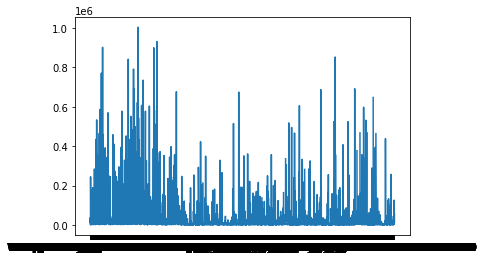

In [204]:
plt.plot(twitter_data["created_at"][:],twitter_data["favorite_count"][:])

# New try with academic research account and v2 endpoints

### Imports

In [51]:
from searchtweets import ResultStream, gen_request_parameters, load_credentials, collect_results, convert_utc_time

### API credentials
My API authentication tokens and keys are kept in a YAML file, outside of the git repo, to keep them confidential. Here I load them from the file.

In [2]:
credential_file = "../../.twitter_keys.yaml"
search_args = load_credentials(credential_file,yaml_key="search_tweets_v2",env_overwrite=False)

### building the first query parameters
Searching only tweets from Musk, and getting the dates, content, and public metrics. Only 500 tweets can be returned per API call

In [78]:
query = gen_request_parameters("from:elonmusk",tweet_fields="id,created_at,text,public_metrics,author_id",results_per_call=500)
print(query)

{"query": "from:elonmusk", "max_results": 500, "tweet.fields": "id,created_at,text,public_metrics,author_id"}


### Making the API call

In [79]:
tweets = collect_results(query,max_tweets=500,result_stream_args=search_args)

### Cheking the result
to make sure it looks like what I want

In [215]:
print(len(tweets))
[print(tweet['text'],tweet['public_metrics'], end='\n\n') for tweet in tweets[0:10]]

97
@sandt_tyler Yes {'retweet_count': 15, 'reply_count': 21, 'like_count': 696, 'quote_count': 7}

@somepitch Yes {'retweet_count': 15, 'reply_count': 10, 'like_count': 619, 'quote_count': 9}

@Erdayastronaut Yes {'retweet_count': 30, 'reply_count': 53, 'like_count': 1377, 'quote_count': 9}

RT @JaneidyEve: SpaceX first Starship hopper under Texas Boca Chica Beach's cloudy sky.
@elonmusk #Starship #SpaceX https://t.co/hVg5Ken7Vp {'retweet_count': 2536, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}

This is for suborbital VTOL tests. Orbital version is taller, has thicker skins (won’t wrinkle) &amp; a smoothly curving nose section. {'retweet_count': 1007, 'reply_count': 579, 'like_count': 18458, 'quote_count': 68}

Starship test flight rocket just finished assembly at the @SpaceX Texas launch site. This is an actual picture, not a rendering. https://t.co/k1HkueoXaz {'retweet_count': 20844, 'reply_count': 4463, 'like_count': 118142, 'quote_count': 3082}

RT @cleantechnica: Tesla H

[None, None, None, None, None, None, None, None, None, None]

### first and last tweet recovered by the call
we neglect the last "tweet" because it's not actually a tweet, but meta data about the api call return, see bellow

In [216]:
print(tweets[0]['created_at'], end='\n')
print(tweets[-2]['created_at'], end='\n')

2019-01-11T03:49:06.000Z
2019-01-01T00:20:48.000Z


We see that the last "tweet" is not actually a tweet

In [217]:
print(tweets[-1])
print(tweets[-2])
print(tweets[-3])

{'newest_id': '1083571475599245312', 'oldest_id': '1079895177970372608', 'result_count': 96}
{'created_at': '2019-01-01T00:20:48.000Z', 'text': 'Haha', 'public_metrics': {'retweet_count': 27048, 'reply_count': 4995, 'like_count': 158071, 'quote_count': 4233}, 'author_id': '44196397', 'id': '1079895177970372608'}
{'created_at': '2019-01-01T02:09:18.000Z', 'text': '@IanReyTamayo Haha', 'public_metrics': {'retweet_count': 757, 'reply_count': 856, 'like_count': 21111, 'quote_count': 491}, 'author_id': '44196397', 'id': '1079922484445495296'}


### Collecting all the call results in one list
Since each call only returns 500 tweets max, we have to do multiple calls, and then group them all together to get all the data we need. Here I do this by manually looping, but I'll implement a automatic loop later in this notebook. Here I just want to get all the data once, and make sure it all goes smooth before automating for other searches (like maybe @Tesla)

In [89]:
data = []

updating the list:

In [218]:
data = data+tweets[:-1]

In [219]:
print(len(data))

7859


updating the end parameter, to not get the tweets we already have

In [212]:
end_dt = tweets[-2]['created_at'][:-8]
start_dt = '2019-01-01T00:00'

updating the query

In [213]:
query = gen_request_parameters("from:elonmusk",tweet_fields="id,created_at,text,public_metrics,author_id",results_per_call=500,start_time=start_dt,end_time=end_dt)
print(query)

{"query": "from:elonmusk", "max_results": 500, "start_time": "2019-01-01T00:00:00Z", "end_time": "2019-01-11T04:04:00Z", "tweet.fields": "id,created_at,text,public_metrics,author_id"}


Making the new API call

In [214]:
tweets = collect_results(query,max_tweets=500,result_stream_args=search_args)

### Correcting output data
After running the above code over and over till I got all the data I wanted, it's time to put it in a dataframe and correct it a bit before export.
First I'll make a copy of the data, so if I do anything stupid and I can recover the original data:

In [256]:
data_cp = data

Next I'll correct to remove one "meta tweet" that managed to sneak into the data somehow, and also unpack the 'public_metrics', so they are directly accessible

In [257]:
data_cp = [tweet for tweet in data_cp if 'public_metrics' in tweet]
print(len(data_cp))
print(data_cp[0:5])
#data_cp = [tweet.update(tweet['public_metrics']) for tweet in data_cp]
temp =[]
for tweet in data_cp:
    temp.append(tweet.update(tweet['public_metrics']))
print(len(data_cp))
print(data_cp[0:5])

7857
[{'created_at': '2021-04-28T08:54:22.000Z', 'public_metrics': {'retweet_count': 202, 'reply_count': 200, 'like_count': 3447, 'quote_count': 16}, 'id': '1387329332541104131', 'text': '@RationalEtienne @Erdayastronaut @Twisi80 Starship is literally more pointy because of that movie haha', 'author_id': '44196397', 'retweet_count': 202, 'reply_count': 200, 'like_count': 3447, 'quote_count': 16}, {'created_at': '2021-04-28T08:51:43.000Z', 'public_metrics': {'retweet_count': 131, 'reply_count': 218, 'like_count': 2473, 'quote_count': 22}, 'id': '1387328662073188353', 'text': '@RiusJulien https://t.co/paTKsQjNp8', 'author_id': '44196397', 'retweet_count': 131, 'reply_count': 218, 'like_count': 2473, 'quote_count': 22}, {'created_at': '2021-04-28T08:43:37.000Z', 'public_metrics': {'retweet_count': 2781, 'reply_count': 5728, 'like_count': 38250, 'quote_count': 257}, 'id': '1387326627160408067', 'text': '♥️\nhttps://t.co/juLuKlymEX', 'author_id': '44196397', 'retweet_count': 2781, 'reply_co

And now I'll put the data into a pandas dataframe

In [ ]:
df_data = pd.DataFrame(data_cp)

In [259]:
print(data_cp[0:5])
df_data.head()

[{'created_at': '2021-04-28T08:54:22.000Z', 'public_metrics': {'retweet_count': 202, 'reply_count': 200, 'like_count': 3447, 'quote_count': 16}, 'id': '1387329332541104131', 'text': '@RationalEtienne @Erdayastronaut @Twisi80 Starship is literally more pointy because of that movie haha', 'author_id': '44196397', 'retweet_count': 202, 'reply_count': 200, 'like_count': 3447, 'quote_count': 16}, {'created_at': '2021-04-28T08:51:43.000Z', 'public_metrics': {'retweet_count': 131, 'reply_count': 218, 'like_count': 2473, 'quote_count': 22}, 'id': '1387328662073188353', 'text': '@RiusJulien https://t.co/paTKsQjNp8', 'author_id': '44196397', 'retweet_count': 131, 'reply_count': 218, 'like_count': 2473, 'quote_count': 22}, {'created_at': '2021-04-28T08:43:37.000Z', 'public_metrics': {'retweet_count': 2781, 'reply_count': 5728, 'like_count': 38250, 'quote_count': 257}, 'id': '1387326627160408067', 'text': '♥️\nhttps://t.co/juLuKlymEX', 'author_id': '44196397', 'retweet_count': 2781, 'reply_count':

,created_at,public_metrics,id,text,author_id,retweet_count,reply_count,like_count,quote_count
0,2021-04-28T08:54:22.000Z,"{'retweet_count': 202, 'reply_count': 200, 'li...",1387329332541104131,@RationalEtienne @Erdayastronaut @Twisi80 Star...,44196397,202,200,3447,16
1,2021-04-28T08:51:43.000Z,"{'retweet_count': 131, 'reply_count': 218, 'li...",1387328662073188353,@RiusJulien https://t.co/paTKsQjNp8,44196397,131,218,2473,22
2,2021-04-28T08:43:37.000Z,"{'retweet_count': 2781, 'reply_count': 5728, '...",1387326627160408067,♥️\nhttps://t.co/juLuKlymEX,44196397,2781,5728,38250,257
3,2021-04-28T07:33:33.000Z,"{'retweet_count': 135, 'reply_count': 244, 'li...",1387308991743672322,@AstroJordy @wapodavenport 0% so far,44196397,135,244,2823,27
4,2021-04-28T06:21:41.000Z,"{'retweet_count': 239, 'reply_count': 263, 'li...",1387290907108679680,@muratpak 🔥,44196397,239,263,4783,25


### Saving the data
as a serialized python object (a pickle), so I don't have to make API calls everytime I want to use the data

In [261]:
pickle.dump(df_data, open("../data/twitter_musk_full.pickle",'wb'))

### Some basic exploration just for curiosity's sake
I'll do real exploration of the data in a different notebook

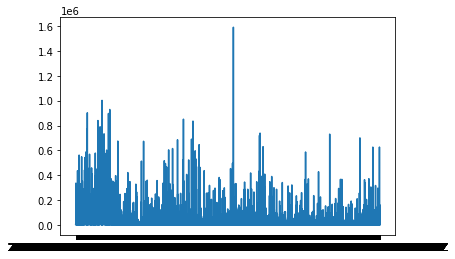

In [262]:
plt.plot(df_data["created_at"][:],df_data["like_count"][:])

wow there seems to be one tweet that got almost double of likes as the next most reacted to. Let's check it out

In [266]:
idx = df_data['like_count'].idxmax()
df_data.iloc[idx]

created_at                                 2020-03-06T20:42:39.000Z
public_metrics    {'retweet_count': 300566, 'reply_count': 43610...
id                                              1236029449042198528
text                                  The coronavirus panic is dumb
author_id                                                  44196397
retweet_count                                                300566
reply_count                                                   43610
like_count                                                  1590840
quote_count                                                   41945
Name: 4070, dtype: object

It's funny that it was this tweet... considering that a few weeks later everyone was hoarding toilet paper and all...

# Making the retrival automated
in the last section, I was recursevly doing the API calls manually to make sure I got at least Elon Musk's tweets, as with my first attempt (using the v1.1 API, and standard track, instead of v2 with academic research track), I had a bunch of problems. This time it worked well, so I will automated it, and maybe get the official tesla tweets (as Musks tweets reaction might not all influence the Tesla Stock. We shall see).

In [2]:
from searchtweets import gen_request_parameters, load_credentials, collect_results

In [7]:
data = []
start_dt = '2019-01-01T00:00'
credential_file = "../../.twitter_keys.yaml"
search_args = load_credentials(credential_file,yaml_key="search_tweets_v2",env_overwrite=False)
#q_param = "from:elonmusk"
q_param = "from:Tesla"
query = gen_request_parameters(q_param,tweet_fields="id,created_at,text,public_metrics,author_id",results_per_call=500,start_time=start_dt)
print(query)
#making the first API call:
tweets = collect_results(query,max_tweets=500,result_stream_args=search_args)
data = data+tweets[:-1]
print(len(data))

{"query": "from:Tesla", "max_results": 500, "start_time": "2019-01-01T00:00:00Z", "tweet.fields": "id,created_at,text,public_metrics,author_id"}
500


In [8]:
for tweet in tweets[0:5]:
    print(tweet, end='\n\n')

{'id': '1387413976296919041', 'text': 'Your Tesla will continue to improve long after you bought it https://t.co/wepMWlVFeN', 'author_id': '13298072', 'public_metrics': {'retweet_count': 897, 'reply_count': 385, 'like_count': 11393, 'quote_count': 76}, 'created_at': '2021-04-28T14:30:43.000Z'}

{'id': '1385178256509480967', 'text': 'RT @elonmusk: Tesla Solar + Powerwall battery enables consumers to be their own utility', 'author_id': '13298072', 'public_metrics': {'retweet_count': 11407, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2021-04-22T10:26:46.000Z'}

{'id': '1383553917234016263', 'text': 'RT @elonmusk: Tesla with Autopilot engaged now approaching 10 times lower chance of accident than average vehicle', 'author_id': '13298072', 'public_metrics': {'retweet_count': 13223, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2021-04-17T22:52:13.000Z'}

{'id': '1382935987681116160', 'text': 'Cybertruck at Giga Texas https://t.co/c1RuektPnN', 

In [9]:
while len(tweets) > 499:
    end_dt = tweets[-2]['created_at'][:-8]
    start_dt = '2019-01-01T00:00'
    query = gen_request_parameters(q_param,tweet_fields="id,created_at,text,public_metrics,author_id",results_per_call=500,start_time=start_dt,end_time=end_dt)
    tweets = collect_results(query,max_tweets=500,result_stream_args=search_args)
    data = data+tweets[:-1]
    print(len(data))

810


In [10]:
print(tweets[-2])

{'public_metrics': {'retweet_count': 428, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1080180385646952448', 'author_id': '13298072', 'created_at': '2019-01-01T19:14:07.000Z', 'text': 'RT @itskrtk: Such a wonderful drive on New Year’s Eve in our #model3. Thank you @Tesla and @elonmusk for not just making an amazing car, bu…'}


wow the official Tesla twitter account tweets a lot less than Elon

In [13]:
df_data = pd.DataFrame(data)

In [18]:
#print(df_data.head())

#data_cp = [tweet for tweet in data_cp if 'public_metrics' in tweet]
#print(len(data_cp))
#print(data_cp[0:5])
#data_cp = [tweet.update(tweet['public_metrics']) for tweet in data_cp]
temp =[]
for tweet in data:
    temp.append(tweet.update(tweet['public_metrics']))
#print(len(data))
#print(data[0:5])

df_data = pd.DataFrame(data)
df_data.tail()

,id,text,author_id,public_metrics,created_at,retweet_count,reply_count,like_count,quote_count
805,1082367348625928192,Tesla Gigafactory 3 groundbreaking in Shanghai...,13298072,"{'retweet_count': 661, 'reply_count': 126, 'li...",2019-01-07T20:04:19.000Z,661,126,5662,62
806,1081322680857518080,“I was absolutely blown away” @Roadshow visits...,13298072,"{'retweet_count': 1087, 'reply_count': 137, 'l...",2019-01-04T22:53:11.000Z,1087,137,8264,63
807,1081124816201998336,"@adamomras @elonmusk Now open to: Austria, Bel...",13298072,"{'retweet_count': 34, 'reply_count': 12, 'like...",2019-01-04T09:46:57.000Z,34,12,279,2
808,1081117088662450177,Model 3 configurator is now open to left-hand ...,13298072,"{'retweet_count': 1681, 'reply_count': 519, 'l...",2019-01-04T09:16:14.000Z,1681,519,15214,229
809,1080180385646952448,RT @itskrtk: Such a wonderful drive on New Yea...,13298072,"{'retweet_count': 428, 'reply_count': 0, 'like...",2019-01-01T19:14:07.000Z,428,0,0,0


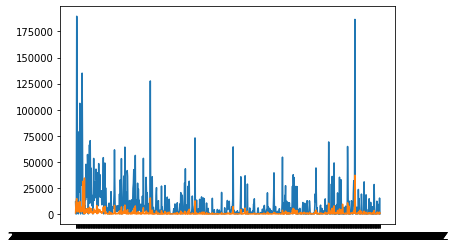

In [21]:
plt.plot(df_data["created_at"][:],df_data["like_count"][:])
plt.plot(df_data["created_at"][:],df_data["retweet_count"][:])

In [22]:
idx = df_data['like_count'].idxmax()
df_data.iloc[idx]

id                                              1382935987681116160
text               Cybertruck at Giga Texas https://t.co/c1RuektPnN
author_id                                                  13298072
public_metrics    {'retweet_count': 14679, 'reply_count': 6029, ...
created_at                                 2021-04-16T05:56:47.000Z
retweet_count                                                 14679
reply_count                                                    6029
like_count                                                   189609
quote_count                                                    2201
Name: 3, dtype: object

In [23]:
pickle.dump(df_data, open("../data/twitter_tesla_full.pickle",'wb'))